In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from scipy.stats import chi2_contingency, spearmanr, ttest_ind
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('Family-Income-and-Expenditure.csv')

In [3]:
df

,Total Household Income,Region,Total Food Expenditure,Main Source of Income,Agricultural Household indicator,Bread and Cereals Expenditure,Total Rice Expenditure,Meat Expenditure,Total Fish and marine products Expenditure,Fruit Expenditure,...,Number of Refrigerator/Freezer,Number of Washing Machine,Number of Airconditioner,"Number of Car, Jeep, Van",Number of Landline/wireless telephones,Number of Cellular phone,Number of Personal Computer,Number of Stove with Oven/Gas Range,Number of Motorized Banca,Number of Motorcycle/Tricycle
0,480332,CAR,117848,Wage/Salaries,0,42140,38300,24676,16806,3325,...,1,1,0,0,0,2,1,0,0,1
1,198235,CAR,67766,Wage/Salaries,0,17329,13008,17434,11073,2035,...,0,1,0,0,0,3,1,0,0,2
2,82785,CAR,61609,Wage/Salaries,1,34182,32001,7783,2590,1730,...,0,0,0,0,0,0,0,0,0,0
3,107589,CAR,78189,Wage/Salaries,0,34030,28659,10914,10812,690,...,0,0,0,0,0,1,0,0,0,0
4,189322,CAR,94625,Wage/Salaries,0,34820,30167,18391,11309,1395,...,1,0,0,0,0,3,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41539,119773,XII - SOCCSKSARGEN,44875,Enterpreneurial Activities,1,23675,21542,1476,6120,1632,...,0,0,0,0,0,1,0,0,0,0
41540,137320,XII - SOCCSKSARGEN,31157,Enterpreneurial Activities,1,2691,1273,1886,4386,1840,...,0,0,0,0,0,3,0,0,0,0
41541,133171,XII - SOCCSKSARGEN,45882,Enterpreneurial Activities,2,28646,27339,480,4796,1232,...,0,0,0,0,0,1,0,0,0,0
41542,129500,XII - SOCCSKSARGEN,81416,Enterpreneurial Activities,1,29996,26655,2359,17730,2923,...,0,0,0,0,0,2,0,0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41544 entries, 0 to 41543
Data columns (total 60 columns):
 #   Column                                         Non-Null Count  Dtype 
---  ------                                         --------------  ----- 
 0   Total Household Income                         41544 non-null  int64 
 1   Region                                         41544 non-null  object
 2   Total Food Expenditure                         41544 non-null  int64 
 3   Main Source of Income                          41544 non-null  object
 4   Agricultural Household indicator               41544 non-null  int64 
 5   Bread and Cereals Expenditure                  41544 non-null  int64 
 6   Total Rice Expenditure                         41544 non-null  int64 
 7   Meat Expenditure                               41544 non-null  int64 
 8   Total Fish and  marine products Expenditure    41544 non-null  int64 
 9   Fruit Expenditure                              41544 non-null

In [5]:
df['Household Head Sex'].value_counts()

Household Head Sex
Male      32483
Female     9061
Name: count, dtype: int64

In [6]:
df['Type of Household'].value_counts()

Type of Household
Single Family                             28445
Extended Family                           12932
Two or More Nonrelated Persons/Members      167
Name: count, dtype: int64

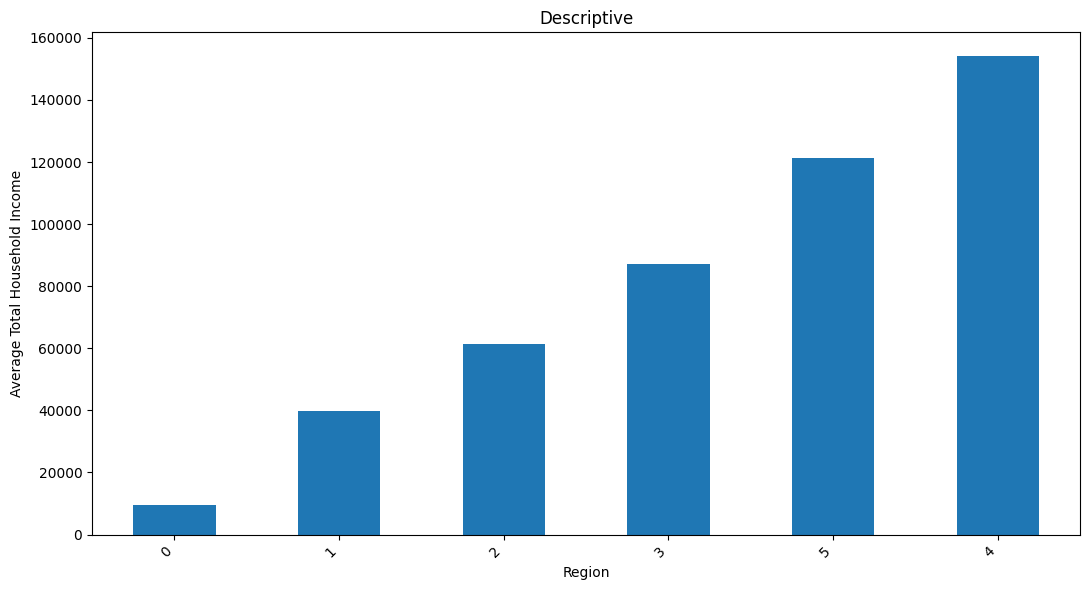

In [7]:
region_income = df.groupby("Number of Car, Jeep, Van")["Transportation Expenditure"].mean().sort_values().head(12)
plt.figure(figsize=(11,6))
region_income.plot(kind="bar")
plt.title("Descriptive")
plt.ylabel("Average Total Household Income")
plt.xlabel("Region")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



In [8]:
grade = df['Household Head Highest Grade Completed']
job = df['Household Head Job or Business Indicator']

data = pd.DataFrame({'grade': grade, 'job': job}).dropna()

contingency = pd.crosstab(data['grade'], data['job'])

chi2, p, dof, expected = chi2_contingency(contingency)

n = contingency.sum().sum()
phi2 = chi2 / n
r, k = contingency.shape
cramers_v = np.sqrt(phi2 / (min(r - 1, k - 1)))

print("Chi-square:", chi2)
print("p-value:", p)
print("Cramer's V:", cramers_v)

Chi-square: 437.58869072606944
p-value: 9.061405362915791e-66
Cramer's V: 0.1026310778278117


In [9]:
food_by_sex = df.groupby('Household Head Sex')['Total Food Expenditure'].mean()
print("Average Food Expenditure by Household Head Sex:")
print(food_by_sex)

median_food = df.groupby('Household Head Sex')['Total Food Expenditure'].median()
print("\nMedian Food Expenditure:")
print(median_food)

Average Food Expenditure by Household Head Sex:
Household Head Sex
Female    82256.779384
Male      85892.028138
Name: Total Food Expenditure, dtype: float64

Median Food Expenditure:
Household Head Sex
Female    69643.0
Male      73677.0
Name: Total Food Expenditure, dtype: float64


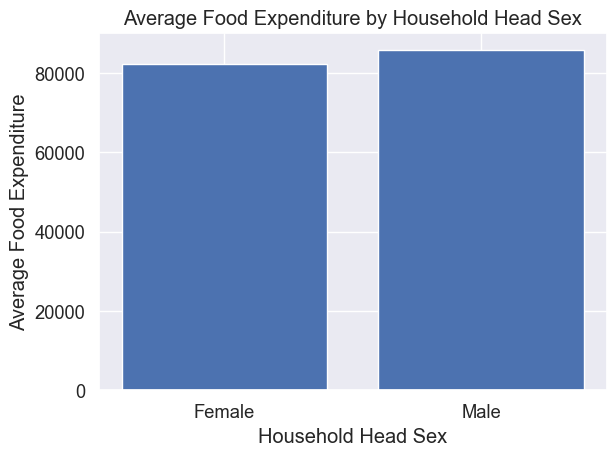

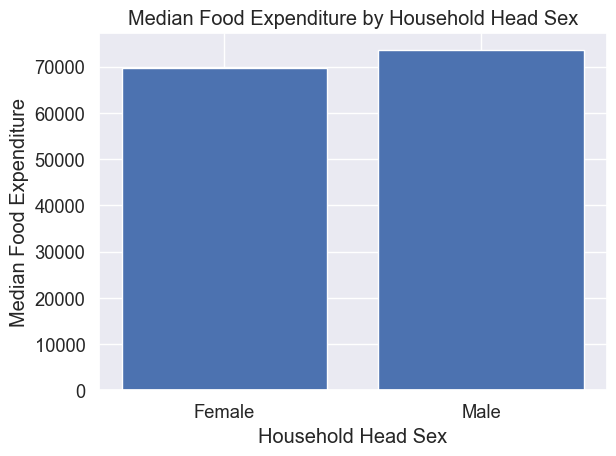

In [50]:
food_by_sex_mean = df.groupby('Household Head Sex')['Total Food Expenditure'].mean()
food_by_sex_median = df.groupby('Household Head Sex')['Total Food Expenditure'].median()

plt.figure()
plt.bar(food_by_sex_mean.index.astype(str), food_by_sex_mean.values)
plt.xlabel("Household Head Sex")
plt.ylabel("Average Food Expenditure")
plt.title("Average Food Expenditure by Household Head Sex")
plt.tight_layout()
plt.show()

plt.figure()
plt.bar(food_by_sex_median.index.astype(str), food_by_sex_median.values)
plt.xlabel("Household Head Sex")
plt.ylabel("Median Food Expenditure")
plt.title("Median Food Expenditure by Household Head Sex")
plt.tight_layout()
plt.show()

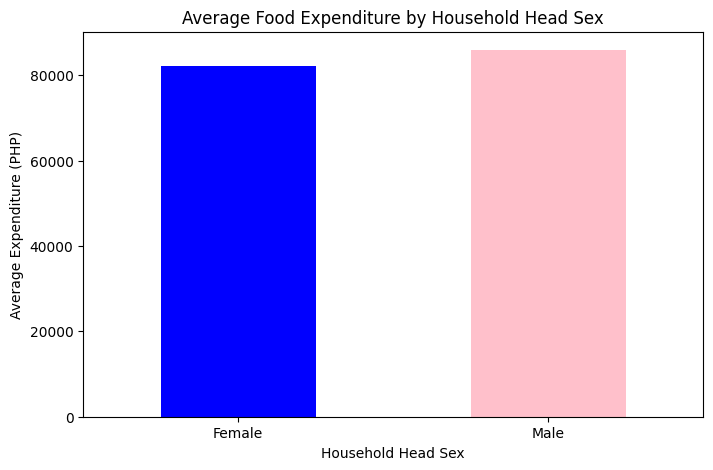

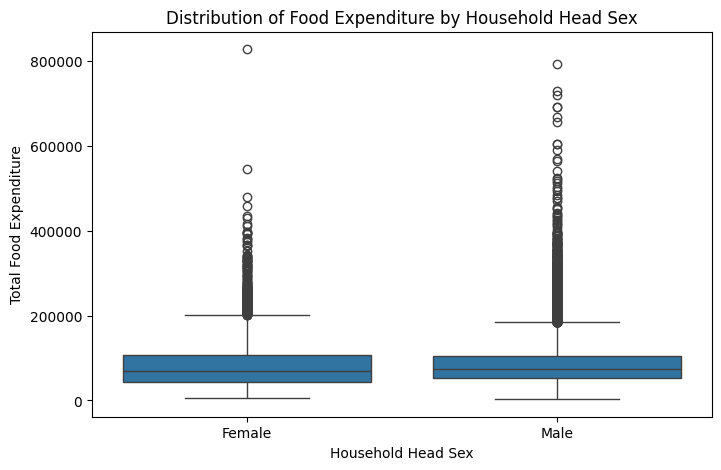

In [10]:
# Bar chart
plt.figure(figsize=(8, 5))
food_by_sex.plot(kind='bar', color=['blue', 'pink'])
plt.title('Average Food Expenditure by Household Head Sex')
plt.ylabel('Average Expenditure (PHP)')
plt.xlabel('Household Head Sex')
plt.xticks(rotation=0)
plt.show()

# Boxplot for distribution
plt.figure(figsize=(8, 5))
sns.boxplot(x='Household Head Sex', y='Total Food Expenditure', data=df)
plt.title('Distribution of Food Expenditure by Household Head Sex')
plt.show()

In [11]:
# Split data by sex
male_food = df[df['Household Head Sex'] == 'Male']['Total Food Expenditure'].dropna()
female_food = df[df['Household Head Sex'] == 'Female']['Total Food Expenditure'].dropna()

# T-test
t_stat, p_value = ttest_ind(male_food, female_food)
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")
if p_value < 0.05:
    print("Significant difference (p < 0.05).")
else:
    print("No significant difference (p >= 0.05).")

T-statistic: 5.9280
P-value: 0.0000
Significant difference (p < 0.05).


In [12]:
ast = df.groupby(['Household Head Sex', 'Region'])['Total Household Income'].mean()
ast

Household Head Sex  Region                   
Female               ARMM                        140130.836257
                    CAR                          292991.111111
                    Caraga                       194213.060519
                    I - Ilocos Region            235110.246847
                    II - Cagayan Valley          214934.736211
                    III - Central Luzon          299443.003861
                    IVA - CALABARZON             312022.761770
                    IVB - MIMAROPA               210793.101504
                    IX - Zasmboanga Peninsula    183597.841808
                    NCR                          403787.237691
                    V - Bicol Region             193661.173451
                    VI - Western Visayas         238996.426791
                    VII - Central Visayas        263132.511278
                    VIII - Eastern Visayas       199082.639640
                    X - Northern Mindanao        223017.167500
         

In [83]:
plt.style.use('default')
sns.set(font_scale=1.2)

grade = df['Household Head Highest Grade Completed']
job = df['Household Head Job or Business Indicator']

data = pd.DataFrame({'grade': grade, 'job': job}).dropna()

contingency = pd.crosstab(data['grade'], data['job'])
display(contingency)

chi2, p, dof, expected = chi2_contingency(contingency)

n = contingency.sum().sum()
phi2 = chi2 / n
r, k = contingency.shape
cramers_v = np.sqrt(phi2 / (min(r - 1, k - 1)))

print("===== Chi-Square Test Results =====")
print("Chi-square value:", chi2)
print("p-value:", p)
print("Degrees of freedom:", dof)
print("\n===== Effect Size =====")
print("Cramer's V:", cramers_v)


job,No Job/Business,With Job/Business
grade,,
"Agriculture, Forestry, and Fishery Programs",34,196
Architecture and Building Programs,5,28
Arts Programs,4,19
Basic Programs,10,23
Business and Administration Programs,366,978
Computing/Information Technology Programs,34,259
Elementary Graduate,1437,6203
Engineering and Engineering Trades Programs,155,622
Engineering and Engineering trades Programs,59,463


===== Chi-Square Test Results =====
Chi-square value: 437.58869072606944
p-value: 9.061405362915791e-66
Degrees of freedom: 45

===== Effect Size =====
Cramer's V: 0.1026310778278117


<Figure size 2000x1900 with 0 Axes>

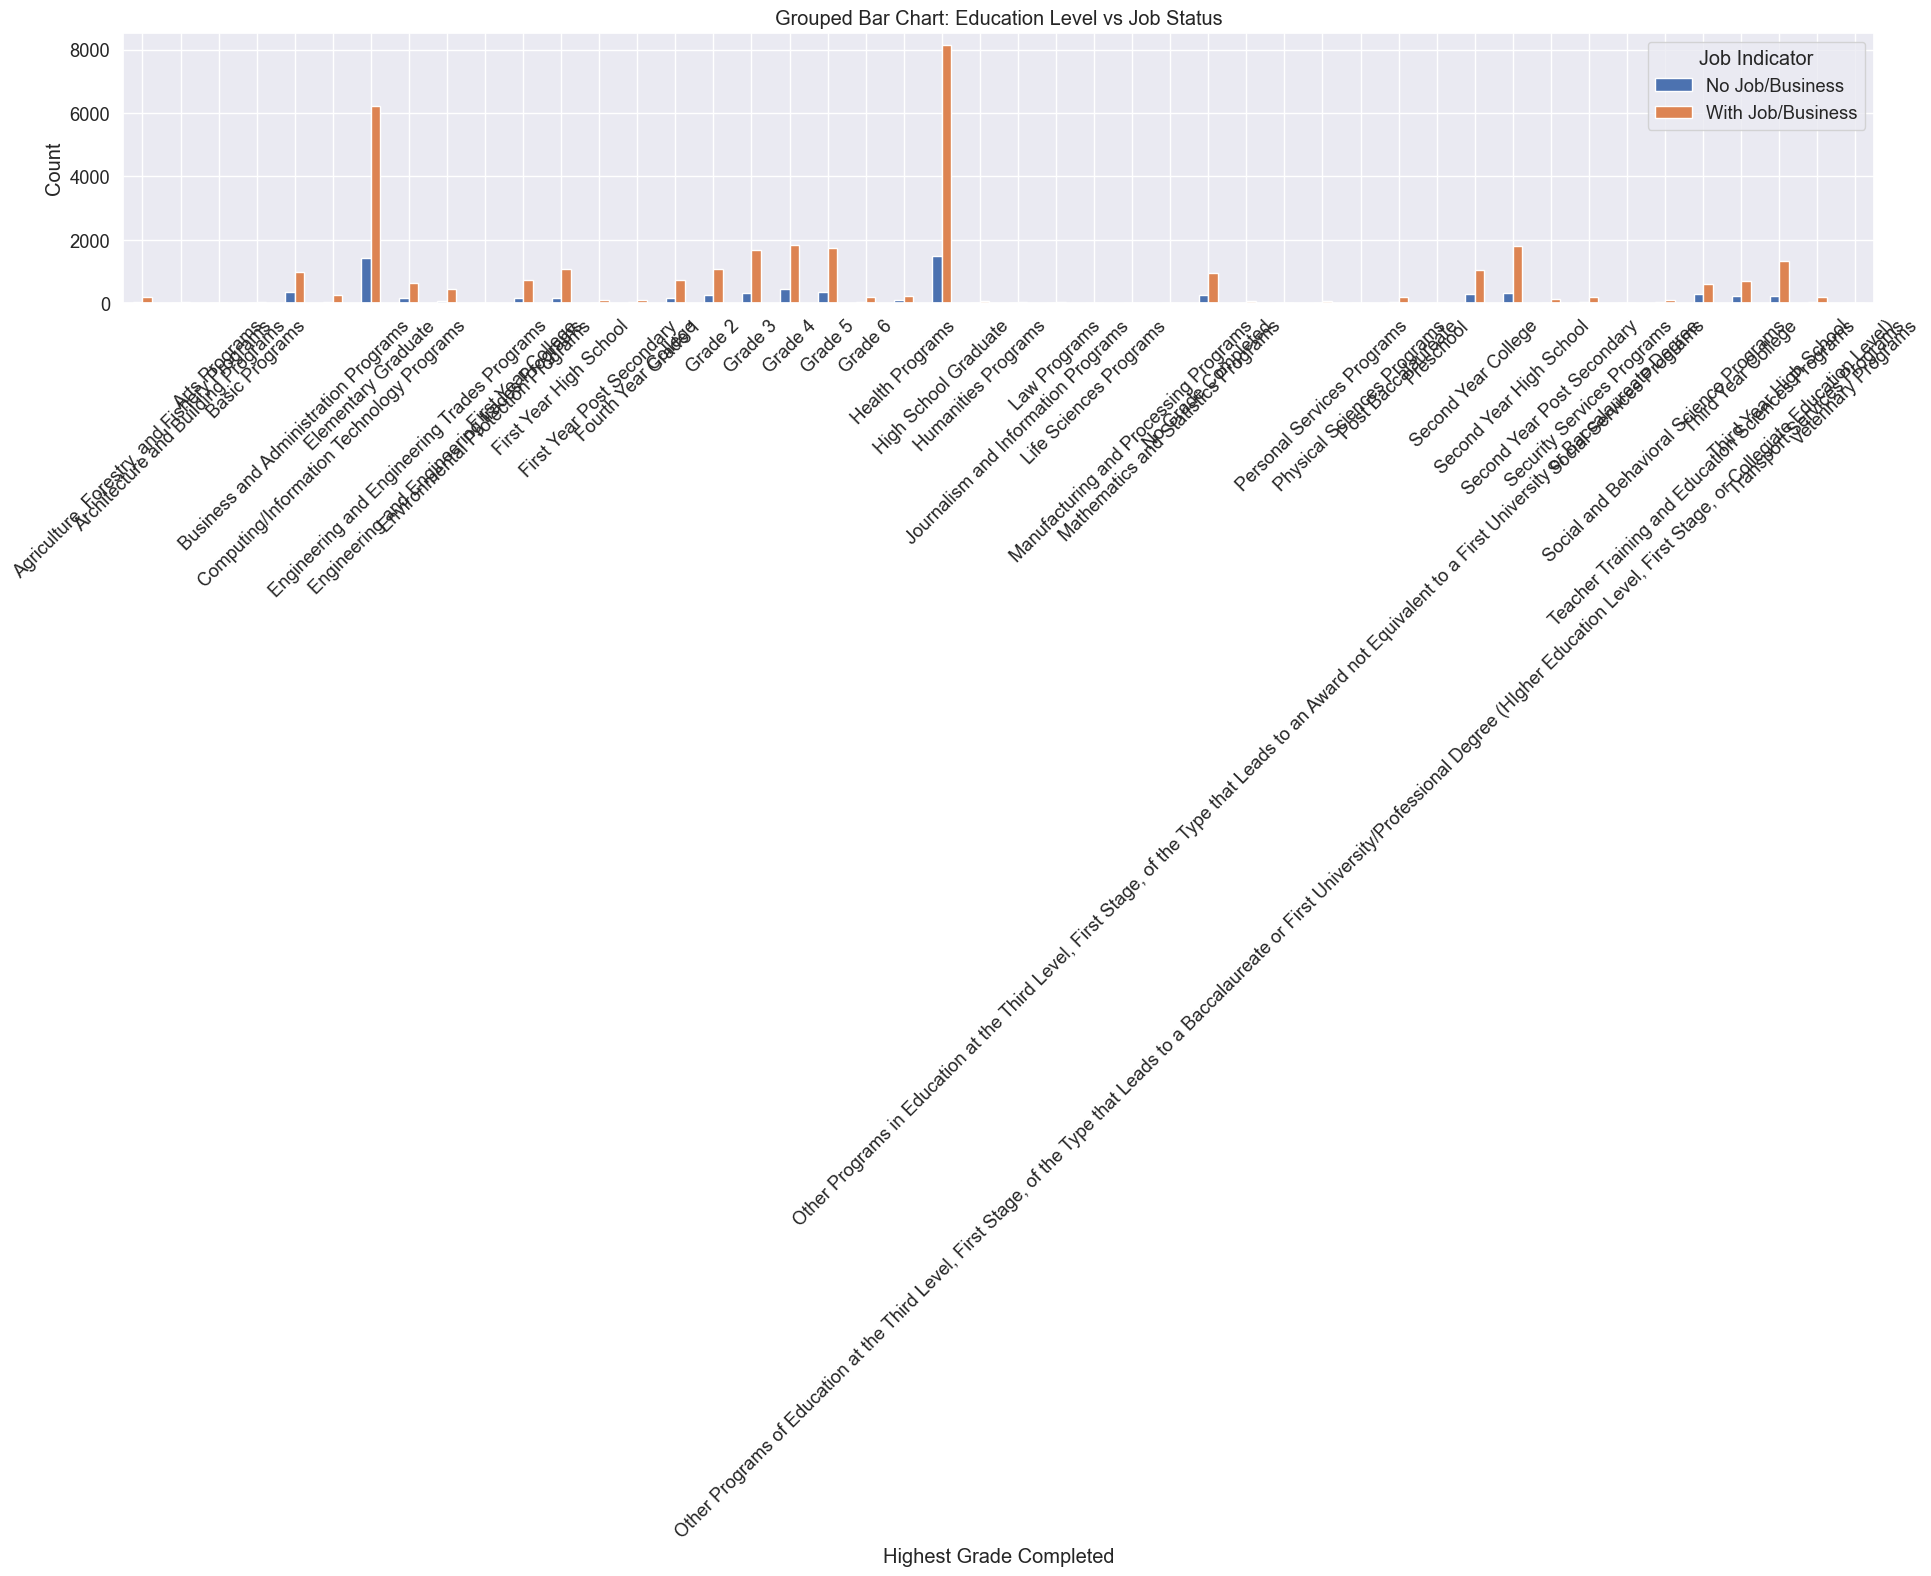

In [49]:
plt.figure(figsize=(20,19))
contingency.plot(kind='bar', figsize=(20,16))
plt.title("Grouped Bar Chart: Education Level vs Job Status")
plt.xlabel("Highest Grade Completed")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Job Indicator")
plt.tight_layout()
plt.show()

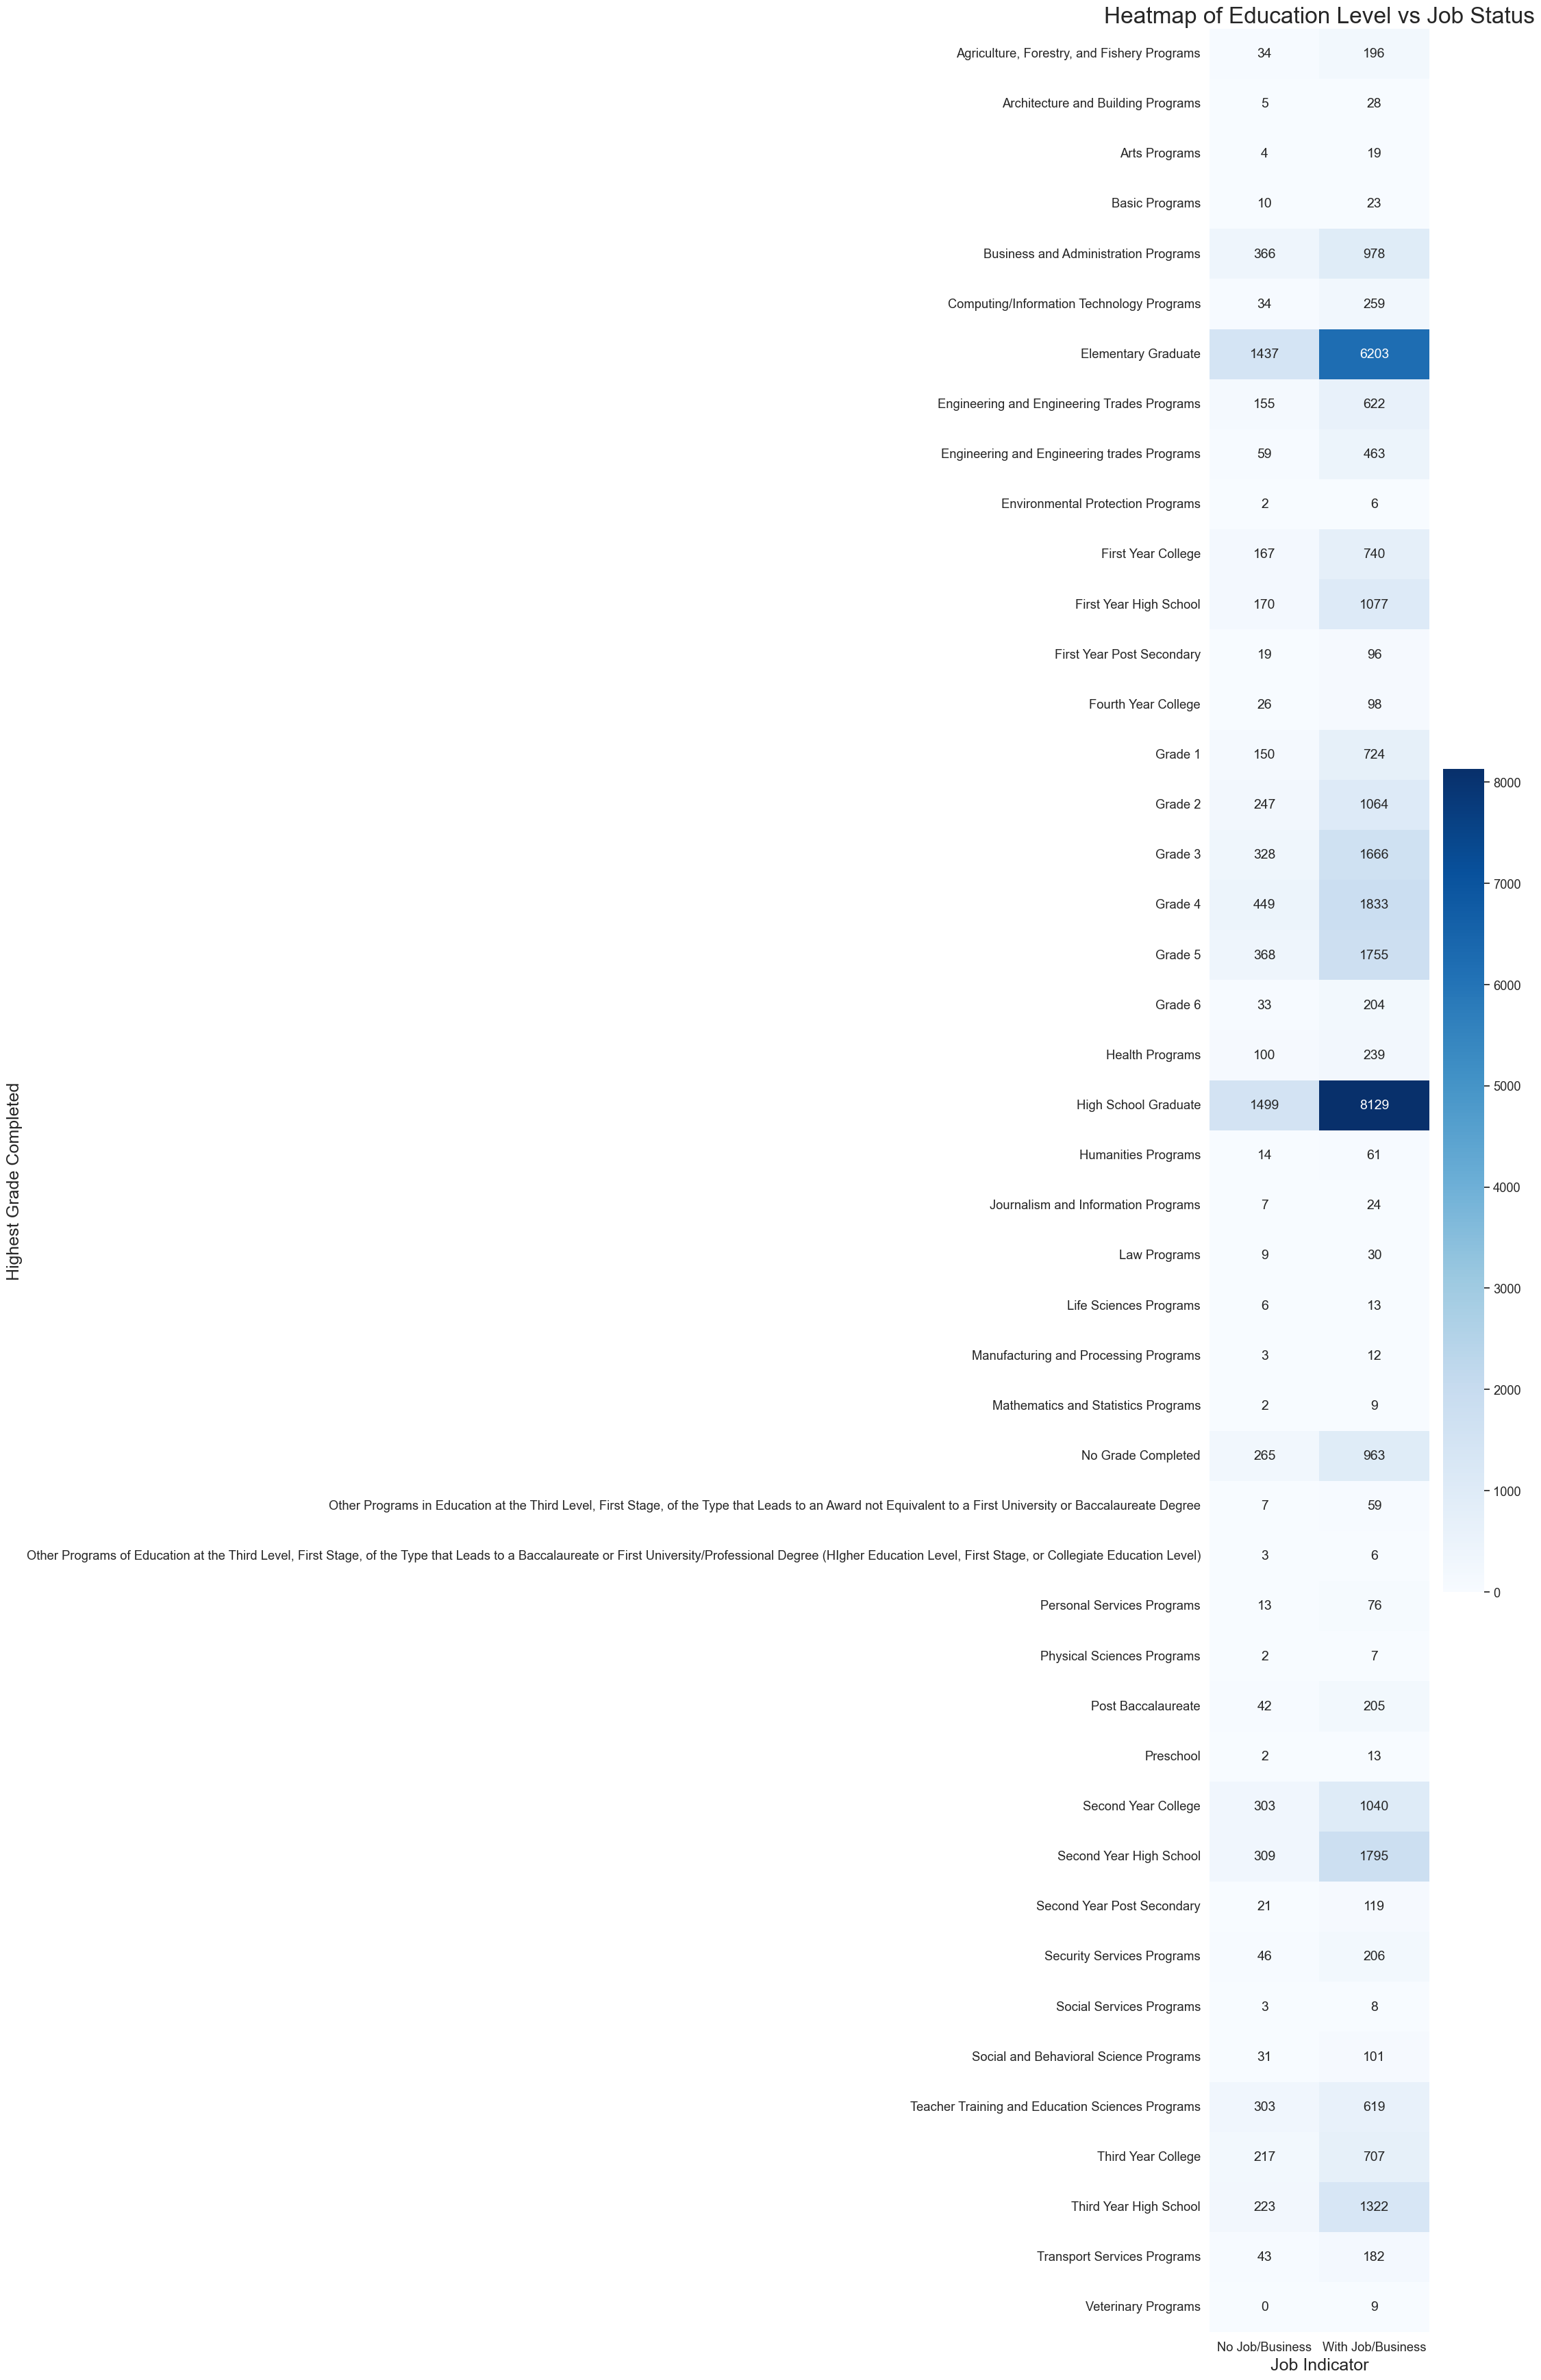

In [36]:
plt.figure(figsize=(22,35))   # Huge heatmap
sns.heatmap(contingency, annot=True, fmt="d", cmap="Blues", annot_kws={"size":14})
plt.title("Heatmap of Education Level vs Job Status", fontsize=24)
plt.xlabel("Job Indicator", fontsize=18)
plt.ylabel("Highest Grade Completed", fontsize=18)
plt.tight_layout()
plt.show()


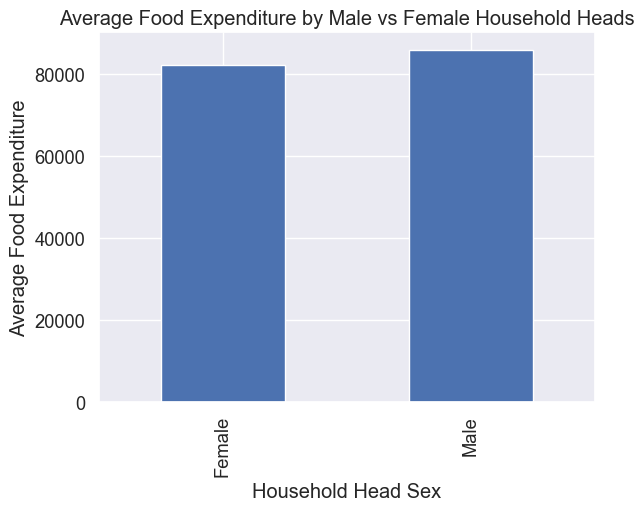

In [55]:
gender_food = df.groupby("Household Head Sex")["Total Food Expenditure"].mean()

gender_food.plot(kind="bar")
plt.title("Average Food Expenditure by Male vs Female Household Heads")
plt.ylabel("Average Food Expenditure")
plt.xlabel("Household Head Sex")
plt.show()


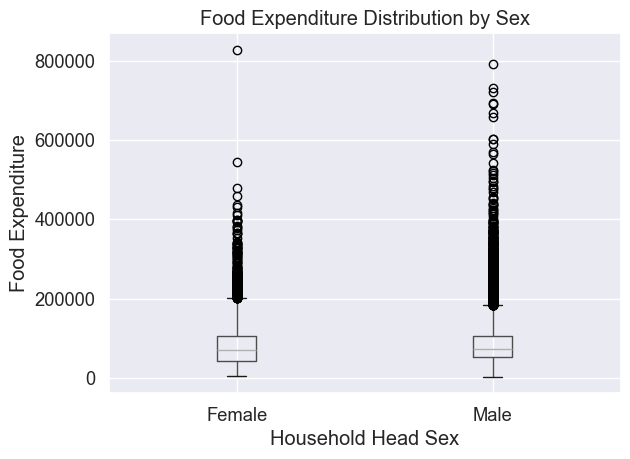

In [56]:
df.boxplot(column="Total Food Expenditure", by="Household Head Sex")
plt.title("Food Expenditure Distribution by Sex")
plt.suptitle("")
plt.ylabel("Food Expenditure")
plt.show()


In [82]:
df['Total Food Expenditure'].value_counts()

Total Food Expenditure
65194    5
51702    5
52969    5
89925    5
50316    4
        ..
87008    1
81469    1
31157    1
81416    1
78195    1
Name: count, Length: 35776, dtype: int64

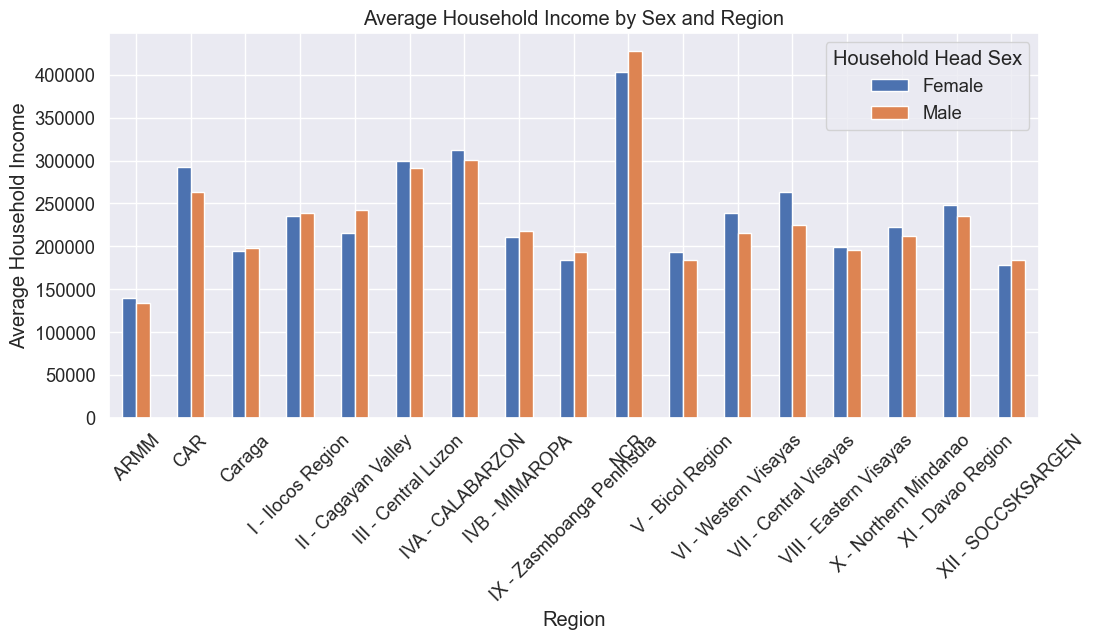

In [58]:
income_region = df.groupby(["Region", "Household Head Sex"])["Total Household Income"].mean().unstack()

income_region.plot(kind="bar", figsize=(12,5))
plt.title("Average Household Income by Sex and Region")
plt.ylabel("Average Household Income")
plt.xlabel("Region")
plt.xticks(rotation=45)
plt.show()


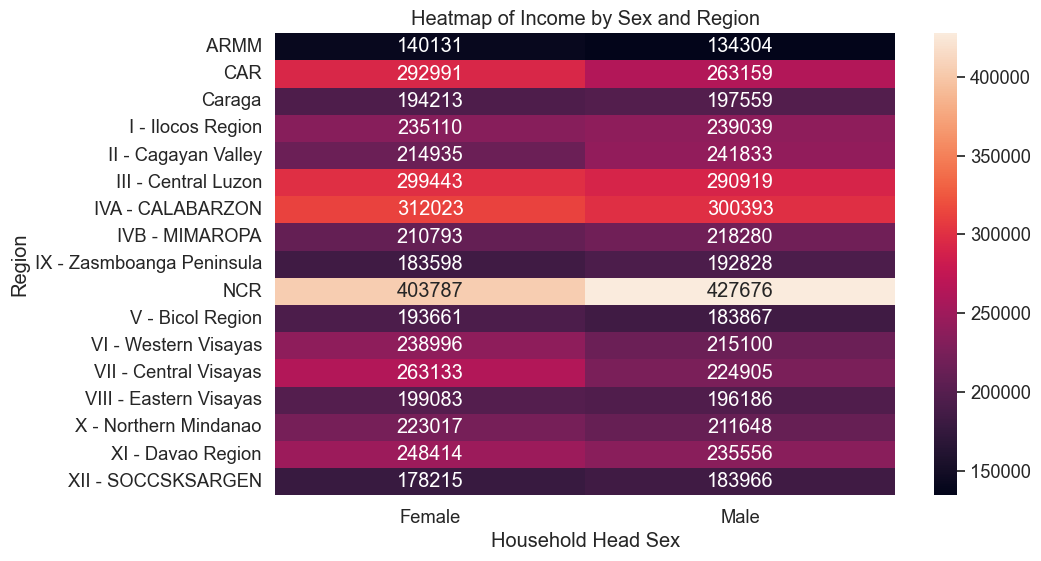

In [59]:
import seaborn as sns

plt.figure(figsize=(10,6))
sns.heatmap(income_region, annot=True, fmt=".0f")
plt.title("Heatmap of Income by Sex and Region")
plt.show()


<h1>DIAGNOSTIC</h1>

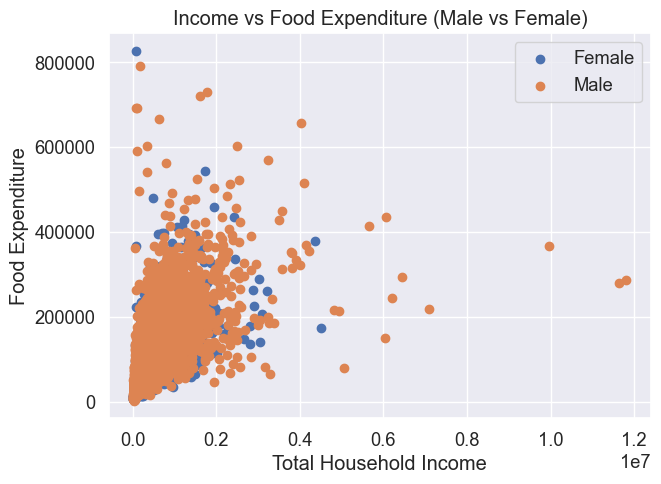

In [60]:
plt.figure(figsize=(7,5))
for sex in df["Household Head Sex"].unique():
    plt.scatter(df[df["Household Head Sex"] == sex]["Total Household Income"],
                df[df["Household Head Sex"] == sex]["Total Food Expenditure"],
                label=sex)

plt.title("Income vs Food Expenditure (Male vs Female)")
plt.xlabel("Total Household Income")
plt.ylabel("Food Expenditure")
plt.legend()
plt.show()


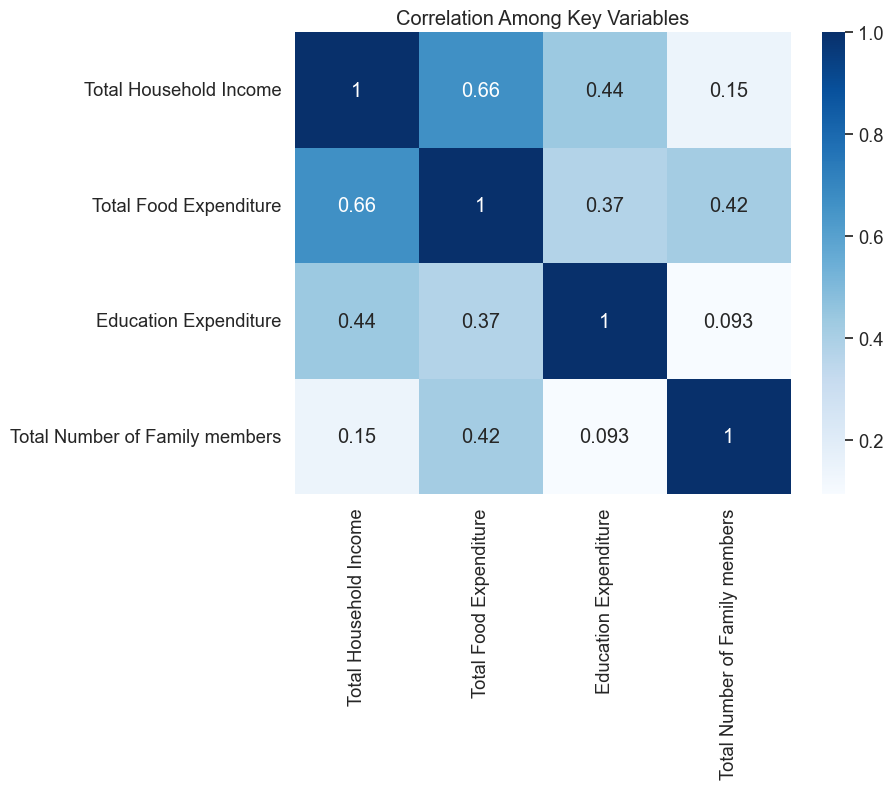

In [67]:
plt.figure(figsize=(8,6))
sns.heatmap(df[["Total Household Income", "Total Food Expenditure", 
                "Education Expenditure", "Total Number of Family members"]].corr(), 
            annot=True, cmap="Blues")
plt.title("Correlation Among Key Variables")
plt.show()


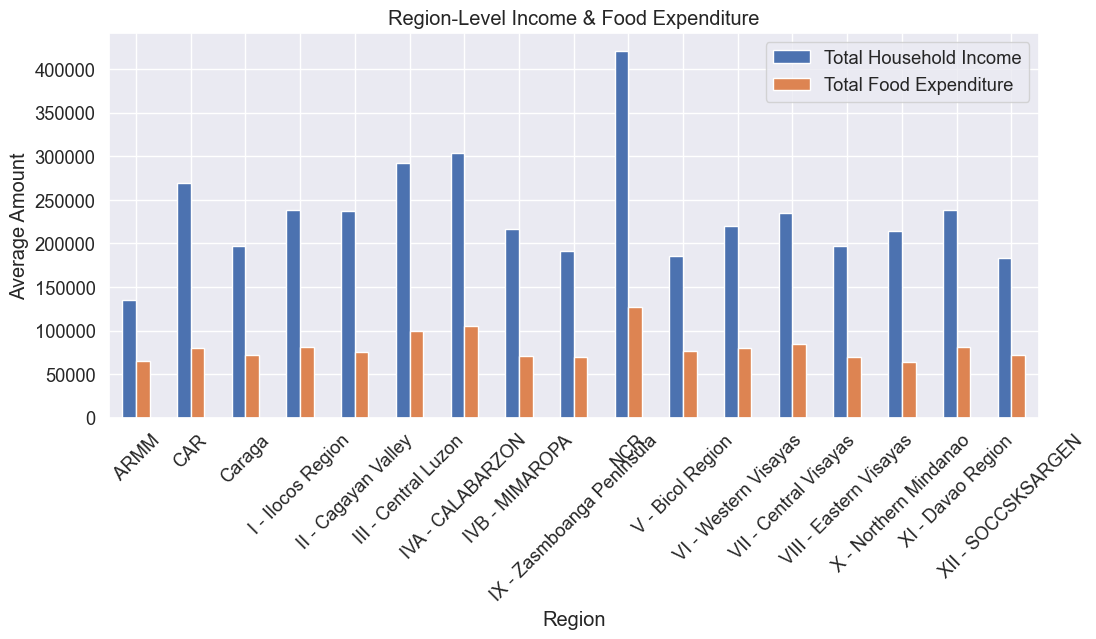

In [74]:
region_compare = df.groupby("Region")[["Total Household Income", "Total Food Expenditure"]].mean()

region_compare.plot(kind="bar", figsize=(12,5))
plt.title("Region-Level Income & Food Expenditure")
plt.ylabel("Average Amount")
plt.xlabel("Region")
plt.xticks(rotation=45)
plt.show()


<h1>PREDICTIVE</h1>

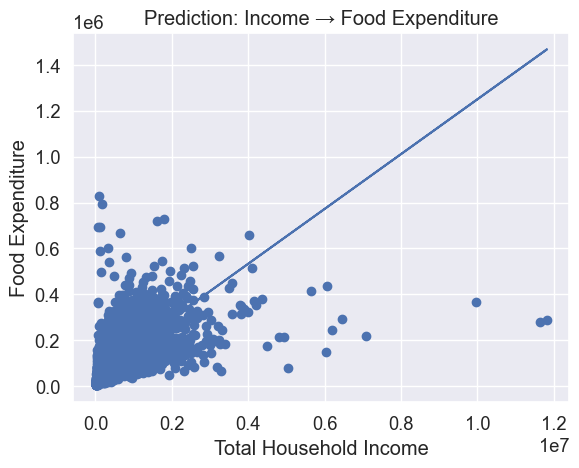

In [75]:
from sklearn.linear_model import LinearRegression
import numpy as np

X = df[["Total Household Income"]]
y = df["Total Food Expenditure"]

model = LinearRegression()
model.fit(X, y)

plt.scatter(X, y)
plt.plot(X, model.predict(X), label="Prediction Line")
plt.title("Prediction: Income → Food Expenditure")
plt.xlabel("Total Household Income")
plt.ylabel("Food Expenditure")
plt.show()


In [76]:
X2 = df[["Total Household Income", "Total Number of Family members"]]
y2 = df["Total Food Expenditure"]

model2 = LinearRegression()
model2.fit(X2, y2)

print("Coefficients:", model2.coef_)
print("Intercept:", model2.intercept_)


Coefficients: [1.10867512e-01 7.44556836e+03]
Intercept: 23141.722087546965


In [80]:
df_encoded = pd.get_dummies(df, columns=["Household Head Sex", "Region"], drop_first=True)

X3 = df_encoded.drop(columns=["Total Household Income"])
y3 = df_encoded["Total Household Income"]
X3 = pd.get_dummies(X3, drop_first=True)

model3 = LinearRegression()
model3.fit(X3, y3)

print("Model Coefficients for Predicting Income:")
for col, coef in zip(X3.columns, model3.coef_):
    print(f"{col}: {coef:.4f}")


Model Coefficients for Predicting Income:
Total Food Expenditure: 0.5334
Agricultural Household indicator: -983.3593
Bread and Cereals Expenditure: -0.0894
Total Rice Expenditure: -0.1443
Meat Expenditure: 0.1638
Total Fish and  marine products Expenditure: 0.6617
Fruit Expenditure: 0.1265
Vegetables Expenditure: -0.8888
Restaurant and hotels Expenditure: 0.2300
Alcoholic Beverages Expenditure: 0.4896
Tobacco Expenditure: 0.3423
Clothing, Footwear and Other Wear Expenditure: 1.9726
Housing and water Expenditure: 0.7004
Imputed House Rental Value: 0.5201
Medical Care Expenditure: 0.7309
Transportation Expenditure: 1.1677
Communication Expenditure: 3.9172
Education Expenditure: 0.7942
Miscellaneous Goods and Services Expenditure: 2.3987
Special Occasions Expenditure: 1.0939
Crop Farming and Gardening expenses: 0.1389
Total Income from Entrepreneurial Acitivites: 0.7570
Household Head Age: 400.4128
Total Number of Family members: -1670.9407
Members with age less than 5 year old: 4529.3700